In [2]:
import numpy as np
import os
from pathlib import Path
from keras.preprocessing import image
import pandas as pd

In [2]:
p = Path("Datasets/Train/images")
dirs = p.glob("*")
image_data = []
labels = []
labels_dict = {"cat":0,"dog":1,"horse":2,"human":3}
for folder_dir in dirs:
    
    label = str(folder_dir).split("/")[-1][:-1]
    
    
    
    for img_path in folder_dir.glob("*.jpg"):
        img = image.load_img(img_path,target_size=(32,32))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])

In [3]:
print(len(image_data))
print(labels)

808
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [4]:
image_data = np.array(image_data,dtype="float32")/255
labels = np.array(labels)

print(image_data.shape,labels.shape)

(808, 32, 32, 3) (808,)


In [5]:
import random
combined = list(zip(image_data,labels))
random.shuffle(combined)

image_data[:],labels[:] = zip(*combined) 

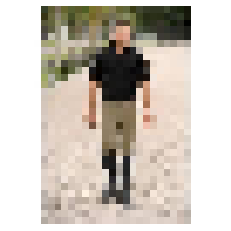

In [6]:
def drawImg(img):
    from matplotlib import pyplot as plt
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    return 
drawImg(image_data[48])

# SVM Classifier

In [127]:
class SVM:
    def __init__(self,C=1.0):
        self.c = C
        self.W = 0
        self.b = 0
    
    def hingeloss(self, W,b,X,Y):
        loss = 0
        
        loss+= 0.5*(np.dot(W,W.T))
        
        m = X.shape[0]
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.c * (max(0,1-ti))
        
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=50, learning_rate = 0.001,maxItr=100):
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        C = self.c
        w = np.zeros((1,no_of_features))
        
        bias = 0
        
        #Initial Loss
        print(self.hingeloss(w,bias,X,Y))
        losses = []
        
        for i in range(maxItr):
            #Training Loop
            l = self.hingeloss(w,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            for batch_start in range(0, no_of_samples, batch_size):
                gradw= 0
                gradb= 0
                
                for j in range(batch_start, batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti = Y[i]*(np.dot(w,X[i].T)+bias)
                        
                        if ti>1:
                            gradw+=0
                            gradb+=0
                        else:
                            gradw += C*Y[i]*X[i]
                            gradb += C*Y[i]
                w = w-n*w + n*gradw
                bias = bias + n*gradb
        self.W=w
        self.b=bias
        
        return w,bias,losses
            

In [111]:
M = image_data.shape[0]
image_data = image_data.reshape(M,-1)
print(image_data.shape)
print(labels.shape)


(808, 3072)
(808,)


In [112]:
CLASSES = len(np.unique(labels))
print(CLASSES)

4


In [113]:
def classWiseData(x,y):
    data ={}
    for i in range(CLASSES):
        data[i] = []
    
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
    
    for k in data.keys():
        data[k] = np.array(data[k])
    return data

In [114]:
data = classWiseData(image_data,labels)

In [115]:
def getDataPairForSVM(d1,d2):
    """Combines Data of 2 classes into a single matrix"""
    l1,l2 = d1.shape[0],d2.shape[0]
    samples = l1+l2
    features = d1.shape[1]
    
    data_pair = np.zeros((samples,features))
    data_labels = np.zeros((samples,))
    data_pair[:l1,:]=d1
    data_pair[l1:,:]=d2
    
    data_labels[:l1] = -1
    data_labels[l1:] = +1
    return data_pair, data_labels

# Lets start NC2

404.0
192.59818779320332


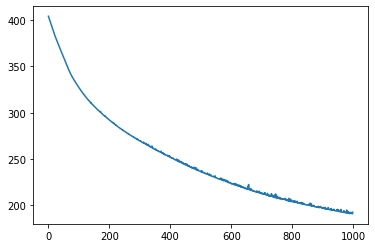

In [134]:
mySVM = SVM()
xp,yp = getDataPairForSVM(data[0],data[1])
w,b,loss = mySVM.fit(xp,yp,learning_rate = 0.00001,maxItr=1000)
print(loss[-1])
from matplotlib import pyplot as plt
plt.plot(loss)

In [151]:
def trainSVMs(x,y):
    svm_classifiers = {}
    for i in range(CLASSES):
        svm_classifiers[i] = {}
        for j in range(i+1,CLASSES):
            xpair,ypair = getDataPairForSVM(data[i],data[j])
            wts,b,loss = mySVM.fit(xpair,ypair,learning_rate = 0.00001,maxItr=1000)
            svm_classifiers[i][j] = (wts,b)
            plt.plot(loss)
            plt.show
            
    return svm_classifiers

404.0
404.0
404.0
404.0
404.0
404.0


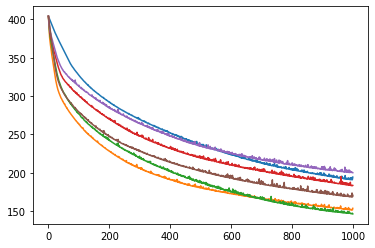

In [152]:
svm_classifiers=trainSVMs(image_data,labels)

In [153]:
cats_dogs = svm_classifiers[0][1]
cats_humans = svm_classifiers[0][3]


In [154]:
def binaryPredict(x,w,b):
    z = np.dot(x,w.T)+b
    if(z>=0):
        return 1
    else:
        return -1

In [155]:
def predict(x):
    count = np.zeros((CLASSES,))
    
    for i in range(CLASSES):
        for j in range(i+1,CLASSES):
            w,b = svm_classifiers[i][j]
            z = binaryPredict(x,w,b)
            
            if(z==1):
                count[j]+=1
            else:
                count[i]+=1
    final_prediction = np.argmax(count)
    
    
    return final_prediction

In [156]:
print(predict(image_data[15]))
print(labels[15])

1
1


In [157]:
def accuracy(x,y):
    count=0
    for i in range(x.shape[0]):
        prediction = predict(x[i])
        if(prediction==y[i]):
            count+=1
    return count/x.shape[0]

In [158]:
print(accuracy(image_data,labels))

0.6163366336633663


In [159]:
from sklearn import svm

In [166]:
svm_classifier = svm.SVC(kernel="poly" ,C=0.5)

In [167]:
svm_classifier.fit(image_data,labels)
svm_classifier.score(image_data,labels)

0.6670792079207921